# PLOT COORDINATES AND AXIS ROTATION

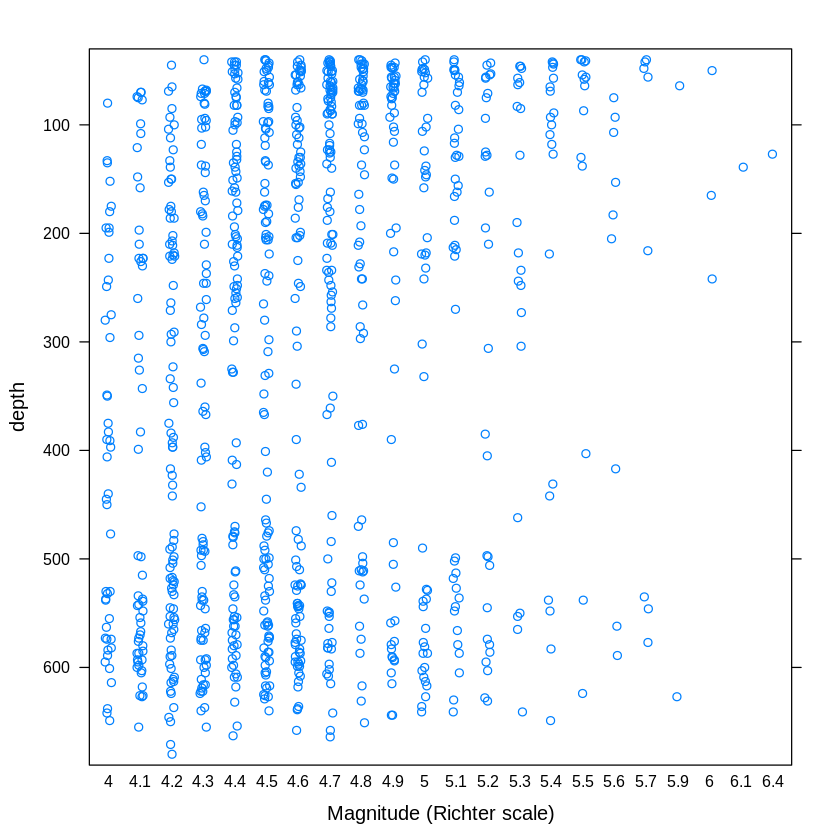

In [4]:
library("lattice")
## Depths of Earthquake Centers versus Magnitudes
stripplot(depth ~ factor(mag), data = quakes, jitter.data = TRUE, 
          ylim = c(690, 30),
          xlab = "Magnitude (Richter scale)")

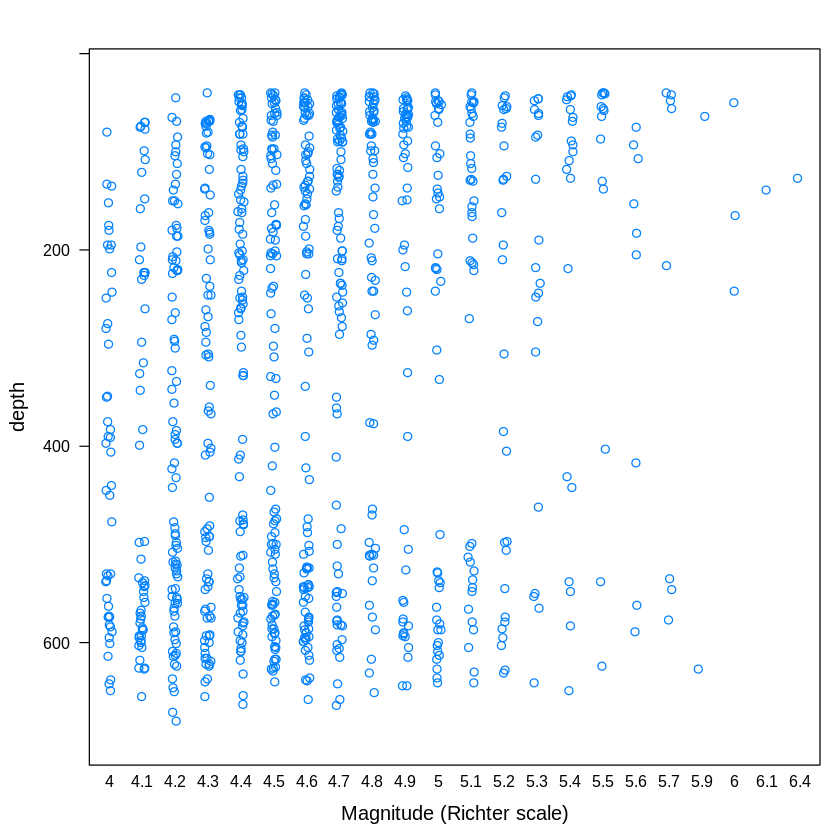

In [2]:
stripplot(depth ~ factor(mag), data = quakes, jitter.data = TRUE, 
          scales = list(y = "free", rot = 0),
          prepanel = function(x, y, ...) list(ylim = rev(range(y))),
          xlab = "Magnitude (Richter scale)")

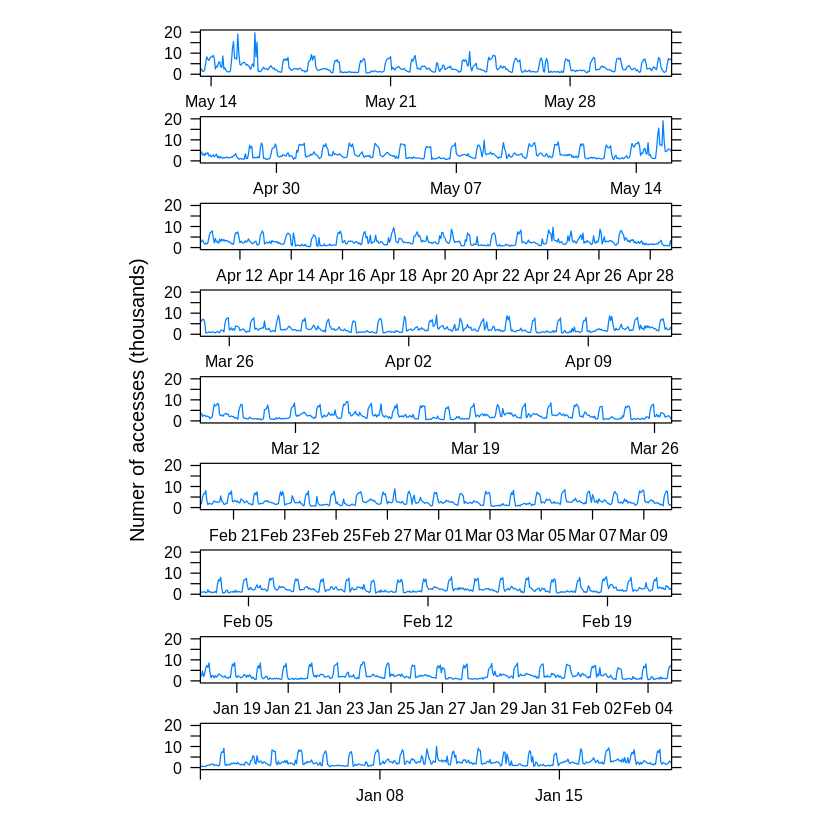

In [3]:
data(biocAccess, package = "latticeExtra")

## Number of hourly accesses to bioconductor.org website
xyplot(counts/1000 ~ time | equal.count(as.numeric(time), 
                                        9, overlap = 0.1), 
       biocAccess, type = "l", aspect = "xy", strip = FALSE,
       ylab = "Numer of accesses (thousands)", xlab = "",
       scales = list(x = list(relation = "sliced", axs = "i"), 
                     y = list(alternating = FALSE)))

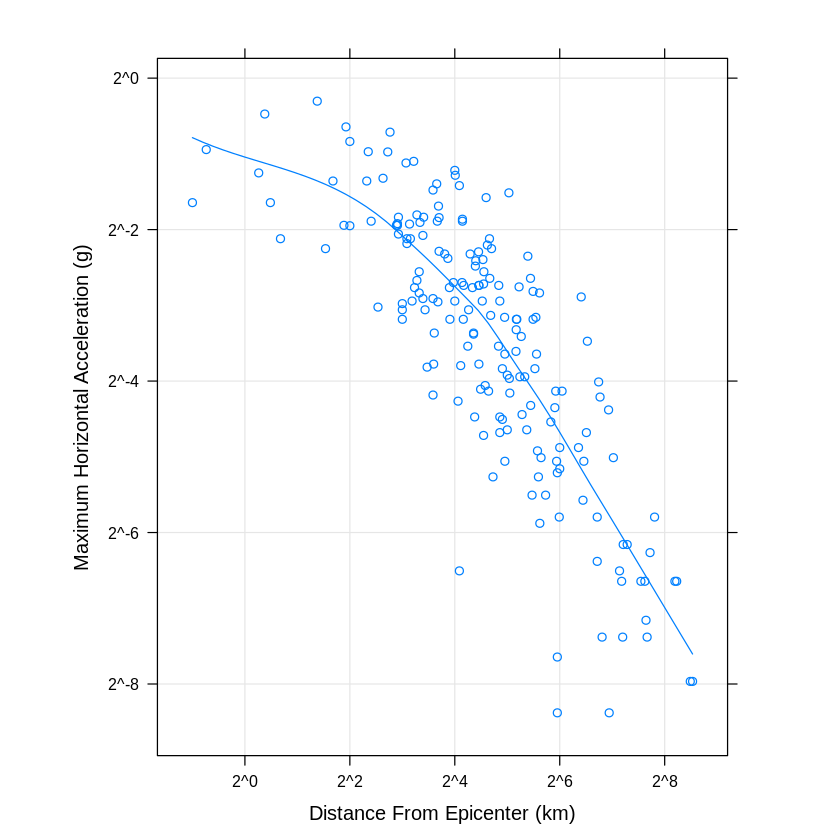

In [5]:
data(Earthquake, package = "MEMSS")

## Automatically chosen aspect ratio
xyplot(accel ~ distance, data = Earthquake,
       prepanel = prepanel.loess, aspect = "xy",
       type = c("p", "g", "smooth"),
       scales = list(log = 2),
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)")

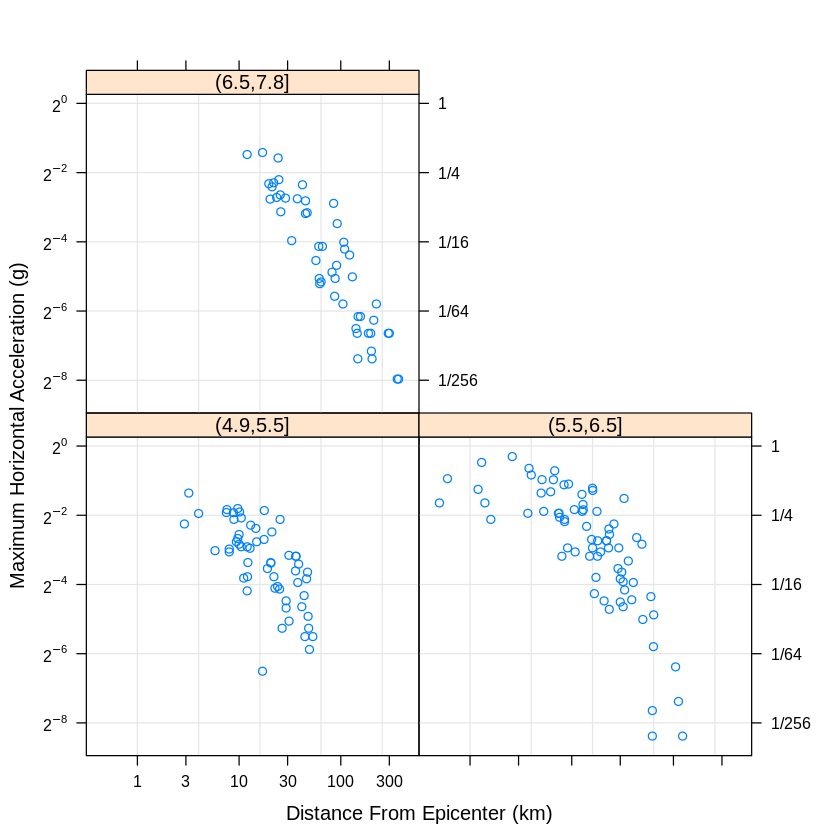

In [6]:
yscale.components.log2 <- function(...) {
  ans <- yscale.components.default(...)
  ans$right <- ans$left
  ans$left$labels$labels <- 
    parse(text = ans$left$labels$labels)
  ans$right$labels$labels <- 
    MASS::fractions(2^(ans$right$labels$at))
  ans
}
logTicks <- function (lim, loc = c(1, 5)) {
  ii <- floor(log10(range(lim))) + c(-1, 2)
  main <- 10^(ii[1]:ii[2])
  r <- as.numeric(outer(loc, main, "*"))
  r[lim[1] <= r & r <= lim[2]]
}
xscale.components.log2 <- function(lim, ...) {
  ans <- xscale.components.default(lim = lim, ...)
  tick.at <- logTicks(2^lim, loc = c(1, 3))
  ans$bottom$ticks$at <- log(tick.at, 2)
  ans$bottom$labels$at <- log(tick.at, 2)
  ans$bottom$labels$labels <- as.character(tick.at)
  ans
}

## Fancy labels for logarithmic axes
xyplot(accel ~ distance | cut(Richter, c(4.9, 5.5, 6.5, 7.8)),
       data = Earthquake, type = c("p", "g"),
       scales = list(log = 2, y = list(alternating = 3)),
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)",
       xscale.components = xscale.components.log2,
       yscale.components = yscale.components.log2)

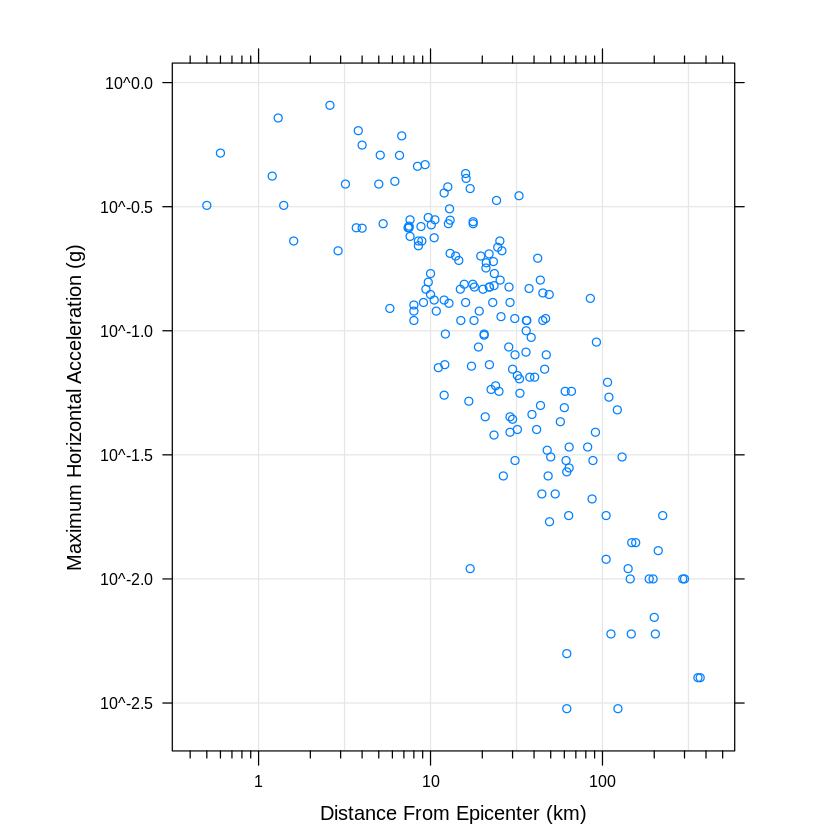

In [7]:
xscale.components.log10 <- function(lim, ...) {
  ans <- xscale.components.default(lim = lim, ...)
  tick.at <- logTicks(10^lim, loc = 1:9)
  tick.at.major <- logTicks(10^lim, loc = 1)
  major <- tick.at %in% tick.at.major
  ans$bottom$ticks$at <- log(tick.at, 10)
  ans$bottom$ticks$tck <- ifelse(major, 1.5, 0.75)
  ans$bottom$labels$at <- log(tick.at, 10)
  ans$bottom$labels$labels <- as.character(tick.at)
  ans$bottom$labels$labels[!major] <- ""
  ans$bottom$labels$check.overlap <- FALSE
  ans
}

## Another example of custom axis annotation
xyplot(accel ~ distance, data = Earthquake, 
       prepanel = prepanel.loess, aspect = "xy", 
       type = c("p", "g"), scales = list(log = 10),
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)",
       xscale.components = xscale.components.log10)

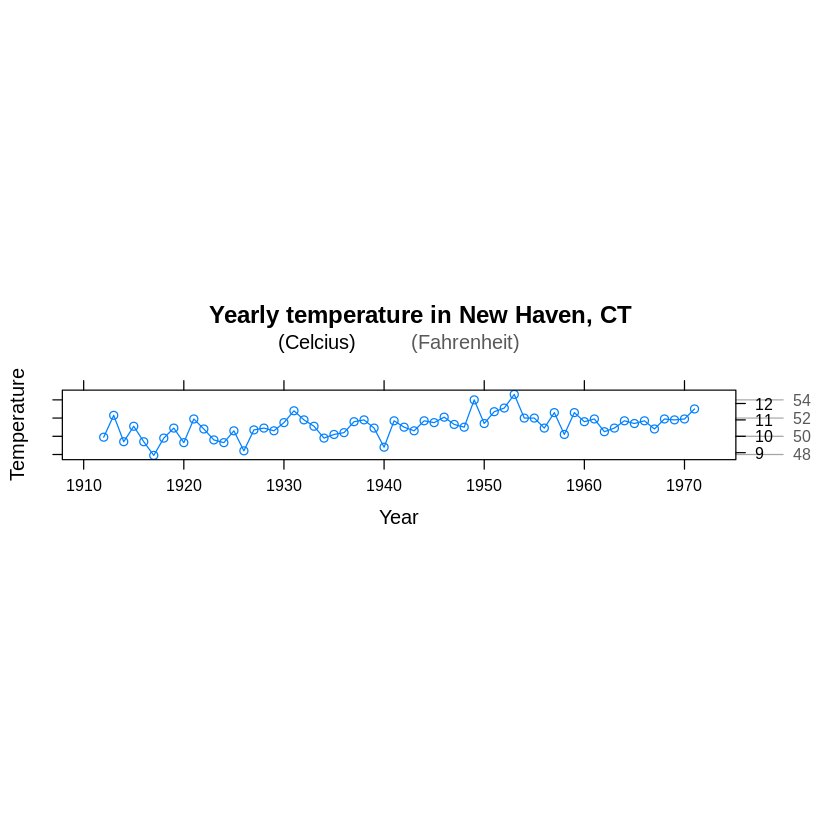

In [8]:
axis.CF <- function(side, ...) {
  if (side == "right") {
    F2C <- function(f) 5 * (f - 32) / 9 
    C2F <- function(c) 32 + 9 * c / 5 
    ylim <- current.panel.limits()$ylim
    prettyF <- pretty(ylim)
    prettyC <- pretty(F2C(ylim))
    panel.axis(side = side, outside = TRUE, at = prettyF, 
               tck = 5, line.col = "grey65", text.col = "grey35")
    panel.axis(side = side, outside = TRUE, at = C2F(prettyC), 
               labels = as.character(prettyC),
               tck = 1, line.col = "black", text.col = "black")
  }
  else axis.default(side = side, ...)
}

## A custom axis function
xyplot(nhtemp ~ time(nhtemp), aspect = "xy", type = "o",
       scales = list(y = list(alternating = 2, tck = c(1, 5))),
       axis = axis.CF, xlab = "Year", ylab = "Temperature", 
       main = "Yearly temperature in New Haven, CT",
       key = list(text = list(c("(Celcius)", "(Fahrenheit)"), 
                              col = c("black", "grey35")), columns = 2))